In [1]:
import pandas as pd
import commonlib.prep_sdk_data as prep_sdk_data
import commonlib.gencharts as gencharts
import matplotlib.pyplot as plt
import commonlib.config as config

Reading terraform data from: /Users/john.carnell/work/stuff/john-carnell/python/airbnb-analysis/data/general-sdk-10.11.2024.json


<module 'matplotlib.pyplot' from '/Users/john.carnell/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

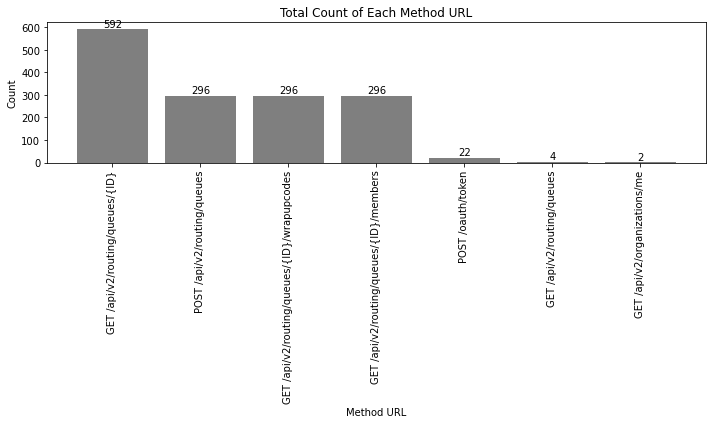

In [3]:
c = config.Config()
print(f'Reading terraform data from: {c.TERRAFORM_LOG_PATH}')
parsed_records=prep_sdk_data.read_json_from_file(c.TERRAFORM_LOG_PATH)
normalized_records=prep_sdk_data.normalize_records(parsed_records)
df = pd.json_normalize(normalized_records)

df_sdk_request = df[df['debug_type'] == 'SDK DEBUG REQUEST']
df_sdk_request= df_sdk_request.rename(columns={'timestamp': 'request_timestamp'})
df_sdk_response = df[df['debug_type'] == 'SDK DEBUG RESPONSE']
df_sdk_response = df_sdk_response.rename(columns={'timestamp': 'response_timestamp'})

df_sdk_request_response = pd.merge(df_sdk_request[['transaction_id', 
'invocation_method','invocation_url','sanitized_url','request_timestamp']],
                             df_sdk_response[['transaction_id','response_timestamp','invcation_status_code','invocation_retry_after']], 
                             on='transaction_id')

df_sdk_request_response['method_url'] = df_sdk_request_response.apply(lambda row: f"{row['invocation_method']} {row['sanitized_url']}", axis=1)                             

df_sdk_request_response.head(100)
gencharts.generate_plt_by_method_url(df_sdk_request_response, df_sdk_request_response['method_url'])

